In [1]:
using Plots
using PyCall
using DataFrames

In [2]:
@pyimport wandb

In [2]:
api = wandb.Api()

LoadError: UndefVarError: wandb not defined

In [4]:
volcanic_field_114 = api.run("p0int/ProtoCLR-C/3rhxialw")

# save the metrics for the run to a csv file
vf_df = volcanic_field_114.history();

In [5]:
cols = vf_df[:columns]
df = DataFrame(Any[collect(values(vf_df[c])) for c in cols], map(Symbol, cols));

In [20]:
df = filter(:train_accuracy_step => !isnan, df[:, [Symbol("trainer/global_step"), Symbol("train_accuracy_step")]])

,trainer/global_step,train_accuracy_step
,Any,Any
1,249,0.415
2,399,0.426667
3,849,0.548333
4,1249,0.598333
5,1599,0.608333
6,1649,0.631667
7,1899,0.68
8,2049,0.646667
9,2149,0.643333


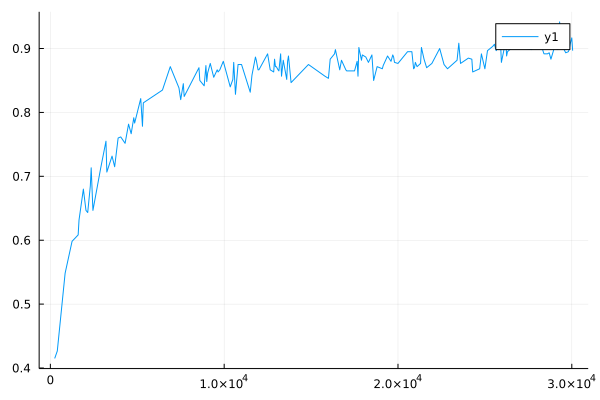

In [21]:
plot(df[:, Symbol("trainer/global_step")],
    df[:, Symbol("train_accuracy_step")])

In [22]:
moving_average(vs,n) = [sum(@view vs[i:(i+n-1)])/n for i in 1:(length(vs)-(n-1))]

moving_average (generic function with 1 method)

In [23]:
moving_average(df[:, Symbol("train_accuracy_step")], 10)

152-element Vector{Float64}:
 0.5883333504199981
 0.6181666851043701
 0.6401666879653931
 0.6566666901111603
 0.6723333537578583
 0.6821666896343231
 0.6921666920185089
 0.6956666946411133
 0.7070000231266022
 0.7188333511352539
 0.7255000174045563
 0.7308333516120911
 0.7443333506584168
 ⋮
 0.9016666948795319
 0.9018333613872528
 0.9018333613872528
 0.9036666929721833
 0.9021666944026947
 0.9020000278949738
 0.9005000293254852
 0.9008333623409271
 0.9015000283718109
 0.9028333604335785
 0.9061666965484619
 0.9056666970252991

In [ ]:
plot(df[:, Symbol("trainer/global_step")][:157],
    moving_average(df[:, Symbol("train_accuracy_step")], 5))